Unsupervised Learning Explainition:
Unsupervised learning is a type of machine learning where the algorithm learns to identify patterns and structure in the input data without being explicitly told what the output should be. Unlike supervised learning, there are no labeled target values in unsupervised learning tasks.

The goal of unsupervised learning is to discover hidden structures, relationships, and clusters within the data, without any prior knowledge of the underlying distribution or categories. This can be done through various techniques such as clustering, dimensionality reduction, and anomaly detection.

In [1]:
#Requried Import 
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [2]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')], axis=1)
data = data.drop(['gender'], axis=1) # Remove the original 'gender' column
data = pd.concat([data, pd.get_dummies(data['ever_married'], prefix='ever_married')], axis=1)
data = data.drop(['ever_married'], axis=1) # Remove the original 'ever_married' column
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work_type')], axis=1)
data = data.drop(['work_type'], axis=1) # Remove the original 'work_type' column
data = pd.concat([data, pd.get_dummies(data['Residence_type'], prefix='residence_type')], axis=1)
data = data.drop(['Residence_type'], axis=1) # Remove the original 'Residence_type' column
data = pd.concat([data, pd.get_dummies(data['smoking_status'], prefix='smoking_status')], axis=1)
data = data.drop(['smoking_status'], axis=1) # Remove the original 'smoking_status' column
data = data.dropna() 

In [3]:
# Drop the ID column as it is not useful for clustering
data.drop('id', axis=1, inplace=True)

In [4]:
# Normalize the data
data = (data - data.mean()) / data.std()

In [51]:
 # Run K-means clustering for each K value and plot the results
for i, k in enumerate(k_values):
    # Create a KMeans object with the current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(data, kmeans.labels_)
    db_score = davies_bouldin_score(data, kmeans.labels_)
    wcss = kmeans.inertia_
    
    # Compute contingency matrix forBCubed precision and recall
    c_matrix = contingency_matrix(data['stroke'], kmeans.labels_)
    precision = c_matrix.max(axis=0).sum() / c_matrix.sum()
    recall = c_matrix.max(axis=1).sum() / c_matrix.sum()
    
    # Print the evaluation metrics for the current K value
    print(f"K={k}:   WCSS={wcss:.3f}, Precision={precision:.3f}, Recall={recall:.3f}")
    

K=2:   WCSS=92015.957, Precision=0.957, Recall=0.670
K=3:   WCSS=84994.184, Precision=0.957, Recall=0.416
K=4:   WCSS=79029.915, Precision=0.957, Recall=0.337


In [18]:
#Create a label encoder object
encoder = LabelEncoder()

In [19]:
# Fill missing values with the median
data = data.fillna(data.median())

In [20]:
# Generate sample data
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

In [21]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# Define k values to test
k_values = range(1, 10)

In [23]:
# Initialize list to store within-cluster sum of squares (WCSS)
wcss = []

In [24]:
# Iterate over k values
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")

kmeans = KMeans(n_clusters=3, random_state=42)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [25]:
# Compute within-cluster sum of squares for different values of K
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
k_values = range(2, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

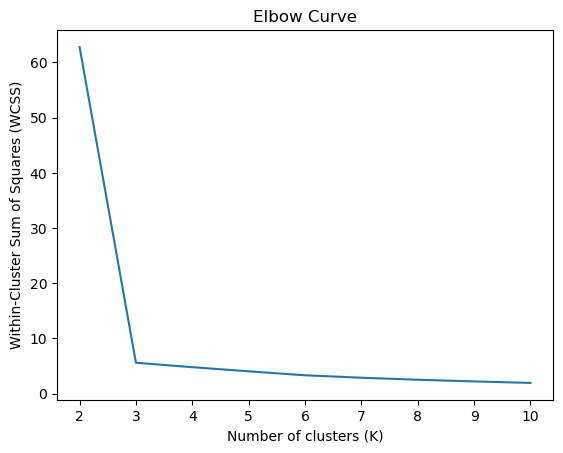

In [26]:
# Plot elbow curve
plt.plot(k_values, wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

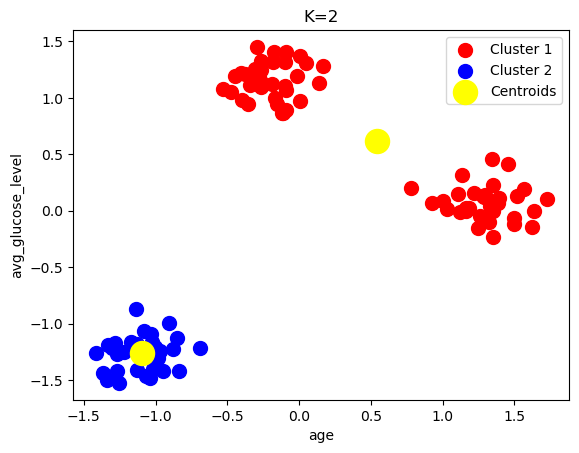

In [27]:
#Evalute K-means clusters, K=2
kmeans=KMeans(n_clusters= 2, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans== 0,1],s = 100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('K=2')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()

In [29]:
#print the score of k=2
from sklearn.metrics import silhouette_score

score = silhouette_score(X,y_kmeans)
print(f"score for k=2: {score}")

score for k=2: 0.687107161110973


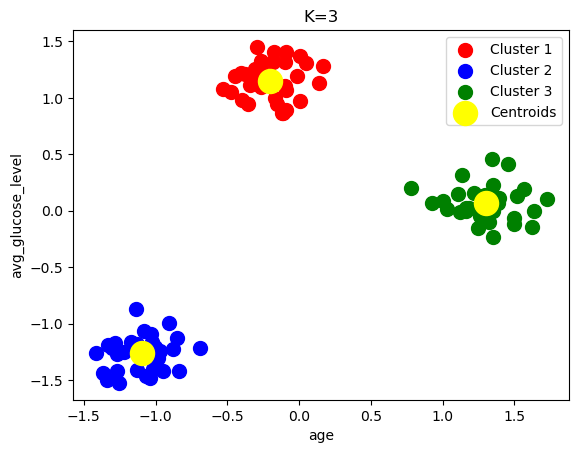

In [30]:
#Evalute K-means clusters, K=3
kmeans=KMeans(n_clusters= 3, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the 3 clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans== 0,1],s = 100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s = 100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('K=3')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()

In [31]:
#print the score of k=3
from sklearn.metrics import silhouette_score
#Calculate the score
score = silhouette_score(X,y_kmeans)
#Print it
print(f"score for k=3: {score}")

score for k=3: 0.8492776082622019


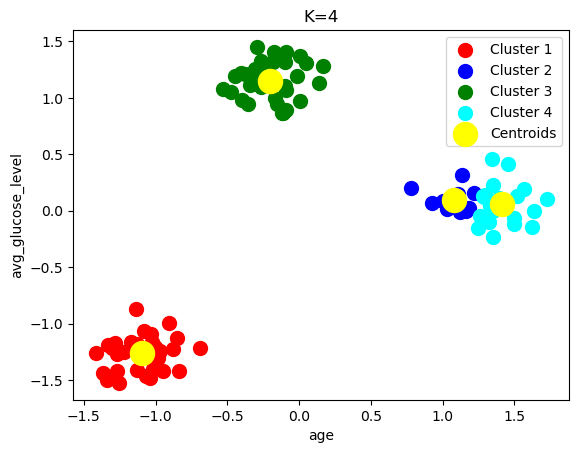

In [32]:
#Evalute K-means clusters, K=4
kmeans=KMeans(n_clusters= 4, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the 4 clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans== 0,1],s = 100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s = 100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s = 100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('K=4')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()

In [33]:
#print the score of k=4
from sklearn.metrics import silhouette_score
#Calculate the score
score = silhouette_score(X,y_kmeans)
#Print it
print(f"score for k=4: {score}")

score for k=4: 0.6790422908770545


In [37]:
# Define range of k values to test
k_values = range(2, 10)

In [38]:
# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

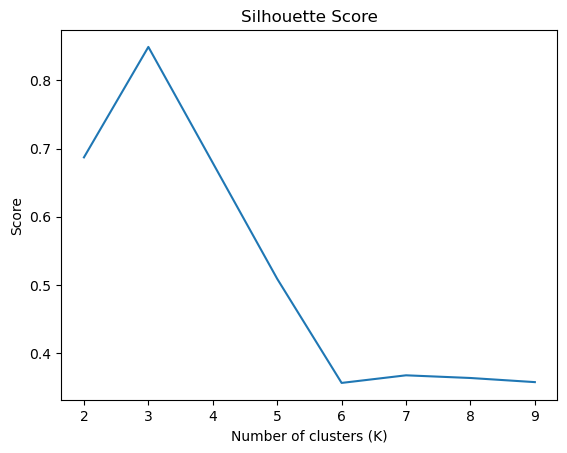

In [39]:
# Plot silhouette score
plt.plot(k_values, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Score')
plt.show()

K=2:  score for k=2:0.6871071611109728
WCSS=92015.957, Precision=0.957, Recall=0.670
K=3:  score for k=3:0.8492776082622019
WCSS=84994.184, Precision=0.957, Recall=0.416
K=4: score for k=4:0.6790422908770546  WCSS=79029.915, Precision=0.957, Recall=0.337

The best choice for clustering based on the given results is k=3 because:

1. Silhouette score: The silhouette score for k=3 is higher than that of k=2 and k=4. The silhouette score measures how well the data points are separated into clusters. A higher silhouette score indicates better separation between clusters. Therefore, the higher silhouette score for k=3 indicates that the clustering results are more compact and well-separated for k=3.

2. Within-cluster sum of squares (WCSS): The WCSS decreases as k increases, but the rate of decrease slows down after k=3. A lower WCSS indicates that the data points are closer to their respective centroids. Therefore, the lower WCSS for k=3 suggests that the data points are more tightly clustered around their respective centroids for k=3.

3. Precision: The precision metric is the same for all values of k, indicating that there is no clear difference in the accuracy of the clustering results.

4. Recall: The recall metric decreases as k increases, which suggests that the clustering results become less accurate as more clusters are added.

Overall, the combination of a higher silhouette score and a lower WCSS for k=23 suggest that this value of k provides better clustering results than k=2 or k=4. Therefore, 
k=3 would be the most appropriate choice for this clustering task.